<a href="https://colab.research.google.com/github/DataMounster/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/Elif_Ayar__of_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import pandas as pd
import numpy as np
import math

In [0]:
# Mean
sales=[3505, 2400, 3027, 2798, 3700, 3250, 2689]
total=sum(sales)

In [0]:
sales_mean=total/len(sales)
sales_mean

3052.714285714286

In [0]:
#let's check
np.mean(sales)

3052.714285714286

In [0]:
#variance
def my_function(number):
  return number-sales_mean

lambda x:x-sales_mean


<function __main__.<lambda>>

In [0]:
distance=list(map(my_function, sales))
distance

[452.2857142857142,
 -652.7142857142858,
 -25.71428571428578,
 -254.71428571428578,
 647.2857142857142,
 197.28571428571422,
 -363.7142857142858]

In [0]:
squared_distance=list(map(lambda x:(x-sales_mean)**2,sales))
squared_distance

[204562.36734693873,
 426035.9387755103,
 661.2244897959217,
 64879.36734693881,
 418978.7959183673,
 38921.65306122446,
 132288.0816326531]

In [0]:
sales_variance=sum(squared_distance)/(len(sales))
sales_variance

183761.06122448976

In [0]:
# let's check 
variance=np.var(sales)
variance


183761.06122448976

In [0]:
sales_std=sales_variance**0.5
sales_std

428.67360686714756

In [0]:
#let's check
std=math.sqrt(sales_variance)
std

428.67360686714756

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
customers=[127, 80, 105, 92, 120, 115, 93]

In [0]:
np.cov(sales,customers)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
customers_mean=sum(customers)/len(customers)
customers_mean

104.57142857142857

In [0]:
def my_number(numbers):
  return numbers-customers_mean


In [0]:
customers_distance=list(map(my_number,customers))
customers_distance

[22.42857142857143,
 -24.57142857142857,
 0.4285714285714306,
 -12.57142857142857,
 15.42857142857143,
 10.42857142857143,
 -11.57142857142857]

In [0]:
squared_distance2=list(map(lambda y:y**2,customers_distance))
squared_distance2

[503.0408163265307,
 603.7551020408163,
 0.18367346938775683,
 158.04081632653057,
 238.0408163265307,
 108.75510204081637,
 133.89795918367344]

In [0]:
customers_variance=sum(squared_distance2)/len(customers)
customers_variance

249.3877551020408

In [0]:
customer_std=customers_variance**0.5
customer_std

15.792015549069118

In [0]:
#let's check 
std2=np.std(customers)
std2

15.792015549069118

In [0]:
# Correlation coefficient
df=pd.DataFrame({'sale':sales})
df['costumer']=pd.DataFrame(customers)
df

,sale,costumer
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [0]:
covariance=df['costumer'].cov(df['sale'])
covariance

7604.357142857142

In [0]:
costumer_std2=df['costumer'].std(ddof=1)
sales_std2=df['sale'].std(ddof=1)

In [0]:
Coefficent=covariance/(sales_std2*costumer_std2)
Coefficent

0.9628339778148909

In [0]:
#Let's check
coefficient2=df['costumer'].corr(df['sale'])
coefficient2

0.9628339778148909

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'
titanic=pd.read_csv(url)
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
titanic.shape

(1310, 16)

In [0]:
titanic.dtypes

Unnamed: 0            int64
pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [0]:
titanic.columns

Index(['Unnamed: 0', 'pclass', 'survived', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body',
       'home.dest', 'has_cabin_number'],
      dtype='object')

In [0]:
titanic_numeric=titanic[['pclass','survived','age','sibsp','parch','fare','body','has_cabin_number']]
titanic_numeric.head()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
0,1.0,1.0,29.0000,0.0,0.0,211.3375,NaN,1
1,1.0,1.0,0.9167,1.0,2.0,151.5500,NaN,1
2,1.0,0.0,2.0000,1.0,2.0,151.5500,NaN,1
3,1.0,0.0,30.0000,1.0,2.0,151.5500,135.0,1
4,1.0,0.0,25.0000,1.0,2.0,151.5500,NaN,1


In [0]:
titanic['body'].isnull().sum()

1189

In [0]:
# drop the body column because of too may missing information
titanic_numeric=titanic[['pclass','survived','age','sibsp','parch','fare','has_cabin_number']]
titanic_numeric.head()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
0,1.0,1.0,29.0000,0.0,0.0,211.3375,1
1,1.0,1.0,0.9167,1.0,2.0,151.5500,1
2,1.0,0.0,2.0000,1.0,2.0,151.5500,1
3,1.0,0.0,30.0000,1.0,2.0,151.5500,1
4,1.0,0.0,25.0000,1.0,2.0,151.5500,1


In [0]:
# Find Variance-covariance Matrix

titanic_numeric.cov()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,10.976961
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,0.174613


In [0]:
# correlation coeffiencet
titanic_numeric.corr()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,0.507253
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
# Perpendicular
a=[2,3]
b=[3,-2,]
c=np.dot(a,b)
c

0

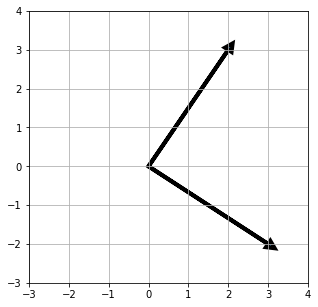

In [0]:
fig, ax = plt.subplots(figsize=(5,5))
ax.grid()
plt.xlim(-3,4)          
plt.ylim(-3,4)

# Plot the vectors
for vector in [a, b]:
    plt.arrow(0,0, vector[0], vector[1], head_width=.2, head_length=0.2, linewidth=4)
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
A=np.array([-5,3,7])
B=np.array([6,-8,2])




In [166]:
perpendicular=np.dot(A,B)
perpendicular

-40

no because dot product is not zero

These two vectors are not perpendicular because the vector form is 3x1 and 3x1..

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c=[2,-15,6,20]

In [0]:
# ||c||^2

norm=np.linalg.norm(c)
norm
squared_norm=norm**2
squared_norm

665.0

In [0]:
# Dot product
dot_product=np.dot(c,c)
dot_product


665

In [0]:
# C tranpose dot c
d=np.transpose(c)
e=np.dot(d,c)
e

665

All have the same result

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

d.T=7[1,0]+12[0,1]

e.T=2[1,0,0]+11[0,1,0]+-8[0,0,1]

Then I can tranpose the vector as a vertical vectors again.

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f=np.array([4,12,11,9,2])
f_norm=np.linalg.norm(f)

In [0]:
unit_vector=f/f_norm
unit_vector

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

In [0]:
#let's check its norm whether equals 1 or not
unit_norm=np.linalg.norm(unit_vector)
unit_norm

0.9999999999999999

Well done

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [0]:
# Linearly dependent vectors in R^2

vector1=[1,-2]
vector2=np.multiply(vector1,2)+vector1
print(vector1,vector2)


[1, -2] [ 3 -6]


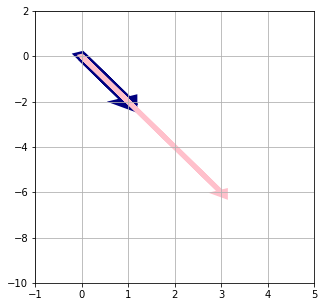

In [0]:
fig, ax = plt.subplots(figsize=(5,5))
ax.grid()
plt.xlim(-1,5)          
plt.ylim(-10,2)

# Plot the vectors
for myvector, mycolor, width in [(vector1, 'navy', 10), (vector2, 'pink', 5)]:
    plt.arrow(0,0,
              myvector[0], 
              myvector[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=width, 
              color=mycolor)

In [0]:
# Linearly independent vectors 
vector_a=np.random.randint(low=-5,high=5,size=2,dtype=int)
vector_b=np.random.randint(low=-5,high=5,size=2,dtype=int)
vector_a

array([3, 0])

In [0]:
vector_b

array([ 1, -3])

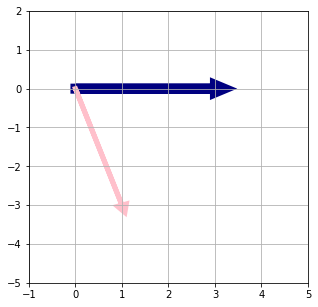

In [0]:
fig, ax = plt.subplots(figsize=(5,5))
ax.grid()
plt.xlim(-1,5)          
plt.ylim(-5,2)

# Plot the vectors
for myvector, mycolor, width in [(vector_a, 'navy', 10), (vector_b, 'pink', 5)]:
    plt.arrow(0,0,
              myvector[0], 
              myvector[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=width, 
              color=mycolor)

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# First Create the vectors
vector_g=np.array([1,2])
vector_h=np.array([4,8])


In [0]:
# Let's choose the scale numbers a,b as 2,4
a,b=(2,4)

In [139]:
#let's write new linear equation ; combinations of two vectors with scale numbers
# a*(g)+b*(h)

new_vector=np.multiply(vector_g,a)+np.multiply(vector_h,b)
new_vector

array([18, 36])

18,36 is the span of two vectors g, and h

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
vector_l=np.array([1,2,3])
vector_m=np.array([-1,0,7])
vector_n=np.array([4,8,2])



In [141]:
#let's write new linear equation ; combinations of three vectors with scale numbers
# a*(l)+b*(m)+c*(n)
a,b,c=(2,3,4)
new_vector=np.multiply(vector_l,a)+np.multiply(vector_m,b)+np.multiply(vector_n,c)
new_vector

array([15, 36, 35])

The span of these three vectors is 15,36,35

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



In [153]:
vector_A=np.random.randint(low=-5,high=5,size=2,dtype=int)
vector_B=np.random.randint(low=-5,high=5,size=2,dtype=int)
vector_A

array([-3,  4])

In [154]:
vector_B

array([-5, -3])

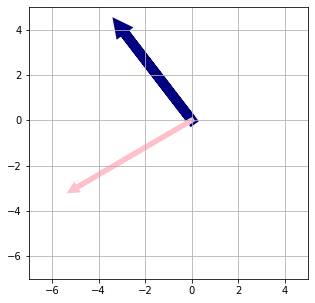

In [160]:
fig, ax = plt.subplots(figsize=(5,5))
ax.grid()
plt.xlim(-7,5)          
plt.ylim(-7,5)

# Plot the vectors
for myvector, mycolor, width in [(vector_A, 'navy', 10), (vector_B, 'pink', 5)]:
    plt.arrow(0,0,
              myvector[0], 
              myvector[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=width, 
              color=mycolor)

## 6.2 What does it mean to form a basis?

If there are two independent vectors in plane, we can say there are 2 basis. Thus, number of indepedent vectors also provide the basis.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [143]:
p=np.array([[1,2,3],
            [-1,0,7],
            [4,8,2]])
p

array([[ 1,  2,  3],
       [-1,  0,  7],
       [ 4,  8,  2]])

In [144]:
np.linalg.matrix_rank(p)

3

## 7.2 What does the rank of a matrix tell us?

There are 3 independent linear equation in matrix.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
v=np.array([1,3])
w=np.array([-1,2])

In [0]:
v_dot_w=np.dot(v,w)
v_dot_v=np.dot(v,v)

In [175]:
fraction=v_dot_w/v_dot_v
fraction

0.5

In [178]:
#projection
p = np.multiply(fraction,v) # 3.vector
print(projection)

[0.5 1.5]


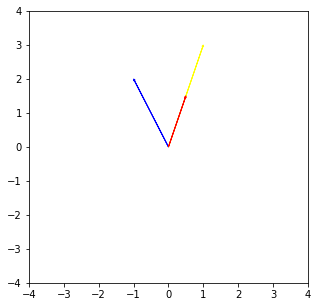

In [180]:
fig, axes = plt.subplots(1, 1, figsize=(5,5))
plt.xlim(-4, 4)
plt.ylim(-4, 4)

# Plot the Scaled Vectors
plt.arrow(0,0, w[0], w[1],head_width=.05, head_length=0.05, color ='blue', length_includes_head=True)
plt.arrow(0,0, v[0], v[1],head_width=.05, head_length=0.05, color ='yellow', length_includes_head=True)

plt.arrow(0,0, p[0], p[1],head_width=.05, head_length=0.05, color ='red', length_includes_head=True)
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

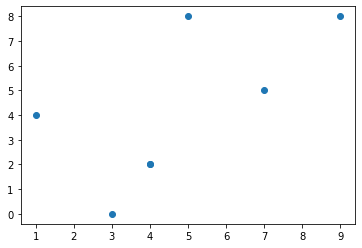

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()